<a href="https://colab.research.google.com/github/EslamKampoza/machine-intelligence-paper-/blob/main/LSML_smote1-1-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
!pip install metric-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
import pandas as pd
import time
from matplotlib import pyplot
import numpy as np
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline
import sklearn.neural_network as nn
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced
#Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
#from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD
#import smote

In [130]:
def plot_confusion_matrix (cm, classes, normalize=False, title='Confusion Matrix', cmap=pyplot.cm.Blues,
                           decsnTreeClf=None):
    #This function prints and plots the confusion matrix.
    pyplot.imshow(cm,interpolation='nearest',cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks=np.arange(len(classes))
    pyplot.xticks(tick_marks,classes,rotation=45)
    pyplot.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j]> thresh else "black" )

    pyplot.tight_layout()
    pyplot.ylabel('True Label')
    pyplot.xlabel('Predicted Label')
    pyplot.show()


In [131]:
train = pd.read_csv('WISDM.csv',header=None)
train = train[(train != '?').all(axis=1)]
#test = pd.read_csv('test.csv')
labels = train[train.columns[len(train.columns)-1]]
Data = train[train.columns[:-1]]
peek=train.head()
print(peek)
print(train.shape)

   0     1     2     3     4     5     6     7     8     9   ...      35  \
0  33  0.04  0.09  0.14  0.12  0.11  0.10  0.08  0.13  0.13  ...  293.94   
1  33  0.12  0.12  0.06  0.07  0.11  0.10  0.11  0.09  0.12  ...  269.44   
2  33  0.14  0.09  0.11  0.09  0.09  0.11  0.12  0.08  0.05  ...  248.65   
3  33  0.06  0.10  0.09  0.09  0.11  0.07  0.12  0.10  0.14  ...  709.09   
4  33  0.12  0.11  0.10  0.08  0.10  0.14  0.10  0.11  0.08  ...    3300   

        36    37    38    39    40    41    42     43       44  
0     1550  3.29  7.21  4.00  4.05  8.17  4.05  11.96  Jogging  
1  1233.33  4.23  6.88  4.05  5.43  8.19  5.43  12.05  Jogging  
2     1780  4.18  6.89  4.07  5.55  8.19  5.55  11.99  Jogging  
3     1380  2.26  4.13  2.49  2.87  4.95  2.87  10.69  Walking  
4     1775  2.29  3.94  2.41  3.08  4.64  3.08  10.80  Walking  

[5 rows x 45 columns]
(4944, 45)


In [132]:
import metric_learn

In [133]:
encoder = LabelEncoder()

#encoding test labels

encoder.fit(labels)
labels_int = encoder.transform(labels)

In [134]:
#mmc = metric_learn.MMC_Supervised()
#X_mmc = mmc.fit_transform(Data, labels_int)
mmc = metric_learn.LSML_Supervised()
X_mmc = mmc.fit(Data, labels_int)

In [135]:
Data.shape

(4944, 44)

In [136]:
MM = mmc.get_mahalanobis_matrix()

In [137]:
MM.shape

(44, 44)

In [138]:
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
import math
from random import randint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




class Smote(object):
	"""docstring for Smote"""

	def __init__(self,distance,MM):
		super(Smote, self).__init__()
		self.synthetic_arr=  []
		self.newindex = 0
		self.distance_measure = distance
		self.mmc = MM       



	def Populate(self,N,i,indices,min_samples,k):
		"""
    		Populates the synthitic array


    		Returns:Synthetic Array to generate_syntheic_points 
    	"""

		while N!=0:
			arr = []
			nn = randint(0,k-2)
			features = len(min_samples[0])
			
			for attr in range(features):
				diff = min_samples[indices[nn]][attr] - min_samples[i][attr]
				gap = random.uniform(0,1)
				arr.append(min_samples[i][attr] + gap*diff)
			
			self.synthetic_arr.append(arr)
			self.newindex = self.newindex + 1
			N = N-1



	def k_neighbors(self,euclid_distance,k):
		nearest_idx_npy = np.empty([euclid_distance.shape[0],euclid_distance.shape[0]],dtype=np.int64)
		
		for i in range(len(euclid_distance)):
			idx = np.argsort(euclid_distance[i])
			nearest_idx_npy[i] = idx
			idx = 0

		return nearest_idx_npy[:,1:k]




	def find_k(self,X,k):

		"""
   			Finds k nearest neighbors using euclidian distance

   			Returns: The k nearest neighbor   
    	"""




		euclid_distance = np.empty([X.shape[0],X.shape[0]],dtype = np.float32)
		
		for i in range(len(X)):
			dist_arr = []
			for j in range(len(X)):
				dist_arr.append(math.sqrt(sum((X[j]-X[i])**2)))
			dist_arr = np.asarray(dist_arr,dtype = np.float32)
			euclid_distance[i] = dist_arr

		return self.k_neighbors(euclid_distance,k)






	def generate_synthetic_points(self,min_samples,N,k):

		"""
    		Returns (N/100) * n_minority_samples synthetic minority samples.
    		Parameters
    		----------
    		min_samples : Numpy_array-like, shape = [n_minority_samples, n_features]
    		    Holds the minority samples
    		N : percetange of new synthetic samples: 
    		    n_synthetic_samples = N/100 * n_minority_samples. Can be < 100.
    		k : int. Number of nearest neighbours. 
    		Returns
    		-------
    		S : Synthetic samples. array, 
    		    shape = [(N/100) * n_minority_samples, n_features]. 
    	"""
		

		if N < 100:
			raise ValueError("Value of N cannot be less than 100%")

		if self.distance_measure not in ('euclidian','ball_tree','Mahal'):
			raise ValueError("Invalid Distance Measure.You can use only Euclidian or ball_tree")


		if k>min_samples.shape[0]:
			raise ValueError("Size of k cannot exceed the number of samples.")

		
		N = int(N/100)
		T = min_samples.shape[0]
		
		

		if self.distance_measure == 'euclidian':
				indices = self.find_k(min_samples,k)
			
		elif self.distance_measure=='ball_tree':
			nb = NearestNeighbors(n_neighbors = k,algorithm= 'ball_tree').fit(min_samples)
			distance,indices = nb.kneighbors(min_samples)
			indices = indices[:,1:]	
		elif self.distance_measure=='Mahal':
			nb = NearestNeighbors(n_neighbors = k,metric = mmc.get_metric()).fit(min_samples)
			distance,indices = nb.kneighbors(min_samples)
			indices = indices[:,1:]	


		for i in range(indices.shape[0]):
			self.Populate(N,i,indices[i],min_samples,k)
		
		return np.asarray(self.synthetic_arr)

		


	def plot_synthetic_points(self,min_samples,N,k):
		"""

			Plot the over sampled synthtic samples in a scatterplot



		"""


		if N < 100:
			raise ValueError("Value of N cannot be less than 100%")

		if self.distance_measure not in ('euclidian','ball_tree','Mahal'):
			raise ValueError("Invalid Distance Measure.You can use only Euclidian or ball_tree")


		if k>min_samples.shape[0]:
			raise ValueError("Size of k cannot exceed the number of samples.")

		
		synthetic_points = self.generate_synthetic_points(min_samples,N,k)
		
		pca = PCA(n_components=2)
		pca.fit(synthetic_points)
		pca_synthetic_points = pca.transform(synthetic_points)
		
		plt.scatter(pca_synthetic_points[:,0],pca_synthetic_points[:,1])
		plt.show()
		

In [139]:
from sklearn.model_selection import train_test_split
trainData, testData, trainLabel, testLabel = train_test_split(Data, labels, test_size=0.20, random_state=42)

In [140]:
trainLabel = trainLabel.values.reshape(-1,1)

In [141]:
trainLabel.shape

(3955, 1)

In [142]:

train = np.hstack((trainData,trainLabel))

In [143]:
mask = train[:,44] == 'Downstairs'
Downstairs = train[mask]

In [144]:
Downstairs

array([[21, 0.12, 0.1, ..., 2.94, 10.44, 'Downstairs'],
       [18, 0.11, 0.13, ..., 5.62, 12.18, 'Downstairs'],
       [28, 0.11, 0.1, ..., 2.4, 10.19, 'Downstairs'],
       ...,
       [29, 0.06, 0.04, ..., 3.36, 4.05, 'Downstairs'],
       [15, 0.1, 0.1, ..., 4.84, 10.14, 'Downstairs'],
       [31, 0.03, 0.07, ..., 7.9, 9.88, 'Downstairs']], dtype=object)

In [145]:
mask = train[:,44] == 'Downstairs'
Downstairs = train[mask]
Downstairs = Downstairs[:,:44]
N = (1625-507) * 100/507
k = 12
Downstairs = np.float_(Downstairs)
smote_test1 = Smote('Mahal',mmc)
new_dsta = smote_test1.generate_synthetic_points(Downstairs[:,:44],N,k)

myclass = np.array(["Downstairs" for x in range(len(new_dsta))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(new_dsta),1)
new_dsta = np.hstack((new_dsta[:,:44],myclass))

In [146]:
mask = train[:,44] == 'Upstairs'
Upstairs = train[mask]
Upstairs = Upstairs[:,:44]
N = (1625-587) * 100/587
k = 12
Upstairs = np.float_(Upstairs)
smote_test1 = Smote('Mahal',mmc)
new_Upsta= smote_test1.generate_synthetic_points(Upstairs[:,:44],N,k)
myclass = np.array(["Upstairs" for x in range(len(new_Upsta))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(new_Upsta),1)
new_Upsta = np.hstack((new_Upsta[:,:44],myclass))

In [147]:
mask = train[:,44] == 'Sitting'
Sitting = train[mask]
Sitting = Sitting[:,:44]
N = (1625-134) * 100/134
k = 12
Sitting = np.float_(Sitting)
smote_test1 = Smote('Mahal',mmc)
new_Sit= smote_test1.generate_synthetic_points(Sitting[:,:44],N,k)
myclass = np.array(["Sitting" for x in range(len(new_Sit))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(new_Sit),1)
new_Sit = np.hstack((new_Sit[:,:44],myclass))

In [148]:
mask1 = train[:,44] == 'Standing'
Standing = train[mask1]
Standing = Standing[:,:44]
N = (1625-75) * 100/75
k = 12
Standing = np.float_(Standing)
smote_test = Smote('Mahal',mmc)
new_sta = smote_test.generate_synthetic_points(Standing[:,:44],N,k)
myclass = np.array(["Standing" for x in range(len(new_sta))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(new_sta),1)
my_sta = np.hstack((new_sta[:,:44],myclass))

In [149]:
new_train_data = np.concatenate((Data, my_sta[:,:44]), axis=0)
new_train_data = np.concatenate((new_train_data, new_dsta[:,:44]), axis=0)
new_train_data = np.concatenate((new_train_data, new_Upsta[:,:44]), axis=0)
new_train_data = np.concatenate((new_train_data, new_Sit[:,:44]), axis=0)

new_train_labels = np.concatenate((labels, my_sta[:,-1]), axis=0)
new_train_labels = np.concatenate((new_train_labels, new_dsta[:,-1]), axis=0)
new_train_labels = np.concatenate((new_train_labels, new_Upsta[:,-1]), axis=0)
new_train_labels = np.concatenate((new_train_labels, new_Sit[:,-1]), axis=0)

new_train_labels = new_train_labels.reshape(len(new_train_labels),1)


In [150]:
full= np.hstack((new_train_data,new_train_labels))
unique,counts = np.unique(new_train_labels,return_counts = True)
dict(zip(unique,counts))

{'Downstairs': 1309,
 'Jogging': 1612,
 'Sitting': 1377,
 'Standing': 1215,
 'Upstairs': 1070,
 'Walking': 2029}

In [151]:
#new_train_data = Data
#new_train_labels = labels
full= np.hstack((new_train_data,new_train_labels))
unique,counts = np.unique(new_train_labels,return_counts = True)
dict(zip(unique,counts))

{'Downstairs': 1309,
 'Jogging': 1612,
 'Sitting': 1377,
 'Standing': 1215,
 'Upstairs': 1070,
 'Walking': 2029}

In [152]:
unique,counts = np.unique(testLabel,return_counts = True)
dict(zip(unique,counts))
#testData, trainLabel, testLabel

{'Downstairs': 106,
 'Jogging': 336,
 'Sitting': 21,
 'Standing': 18,
 'Upstairs': 104,
 'Walking': 404}

In [153]:
Data_res = new_train_data
labels_res = new_train_labels

In [154]:
yy = labels_res.reshape((len(labels_res),1))
print(yy.shape)

(8612, 1)


In [155]:
y_test = testLabel.values.reshape(-1,1)
#y_test = testLabel.reshape((len(testLabel) ,1))
print(y_test.shape)

(989, 1)


In [156]:
train_data_res = np.hstack((Data_res,yy))
test_data = np.hstack(( testData, y_test))
#shuffling data
test =shuffle(test_data) # ruin the sequence data
train=shuffle(train_data_res)
trainData = train[:,:-1]
trainLabel = train[:,-1]
#Separate Input and Output Labels
testData = test_data[:,:-1]
testLabel = test_data[:,-1]

In [157]:
#encoding Labels

encoder = LabelEncoder()

#encoding test labels

encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

#encoding train labels

encoder.fit(trainLabel)
trainLabelE = encoder.transform(trainLabel)

In [158]:
scaler = MinMaxScaler()
scaler.fit(trainData)
trainData = scaler.transform(trainData)
testData = scaler.transform(testData)

In [159]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(trainData,trainLabelE)
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 93.39%


K-Nearest Neighbors Accuracy: 0.90091
Confusion matrix, without normalization
[[ 86   1   1   0  11   7]
 [  2 332   0   0   1   1]
 [  0   0  21   0   0   0]
 [  2   0   0  15   1   0]
 [ 26   0   0   0  72   6]
 [ 32   0   0   0   7 365]]


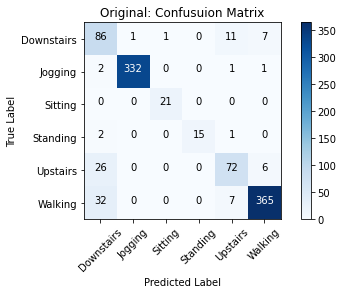

              precision    recall  f1-score   support

           0       0.58      0.81      0.68       106
           1       1.00      0.99      0.99       336
           2       0.95      1.00      0.98        21
           3       1.00      0.83      0.91        18
           4       0.78      0.69      0.73       104
           5       0.96      0.90      0.93       404

    accuracy                           0.90       989
   macro avg       0.88      0.87      0.87       989
weighted avg       0.92      0.90      0.91       989

                   pre       rec       spe        f1       geo       iba       sup

 Downstairs       0.58      0.81      0.93      0.68      0.87      0.75       106
    Jogging       1.00      0.99      1.00      0.99      0.99      0.99       336
    Sitting       0.95      1.00      1.00      0.98      1.00      1.00        21
   Standing       1.00      0.83      1.00      0.91      0.91      0.82        18
   Upstairs       0.78      0.69      0.9

In [160]:
clf2= KNeighborsClassifier(n_neighbors=4)
knnModel2 = clf2.fit(trainData,trainLabelE)
y_te_pred2 = clf2.predict(testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))
print(classification_report_imbalanced(testLabelE,y_te_pred2,     target_names=class_names))

K-Nearest Neighbors Accuracy: 0.93630
Confusion matrix, without normalization
[[ 96   0   0   1   4   5]
 [  1 335   0   0   0   0]
 [  0   0  21   0   0   0]
 [  2   0   1  15   0   0]
 [ 28   0   0   0  73   3]
 [ 13   0   0   0   5 386]]


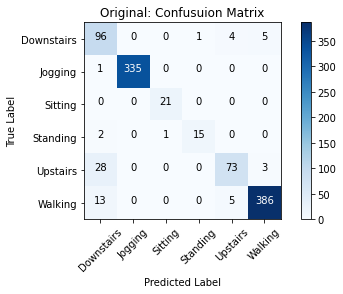

              precision    recall  f1-score   support

           0       0.69      0.91      0.78       106
           1       1.00      1.00      1.00       336
           2       0.95      1.00      0.98        21
           3       0.94      0.83      0.88        18
           4       0.89      0.70      0.78       104
           5       0.98      0.96      0.97       404

    accuracy                           0.94       989
   macro avg       0.91      0.90      0.90       989
weighted avg       0.94      0.94      0.94       989

                   pre       rec       spe        f1       geo       iba       sup

 Downstairs       0.69      0.91      0.95      0.78      0.93      0.86       106
    Jogging       1.00      1.00      1.00      1.00      1.00      1.00       336
    Sitting       0.95      1.00      1.00      0.98      1.00      1.00        21
   Standing       0.94      0.83      1.00      0.88      0.91      0.82        18
   Upstairs       0.89      0.70      0.9

In [161]:
clf2= KNeighborsClassifier(n_neighbors=4, metric = mmc.get_metric())
knnModel2 = clf2.fit(trainData,trainLabelE)
y_te_pred2 = clf2.predict(testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))
print(classification_report_imbalanced(testLabelE,y_te_pred2,     target_names=class_names))

K-Nearest Neighbors Accuracy: 1.00000
Confusion matrix, without normalization
[[106   0   0   0   0   0]
 [  0 336   0   0   0   0]
 [  0   0  21   0   0   0]
 [  0   0   0  18   0   0]
 [  0   0   0   0 104   0]
 [  0   0   0   0   0 404]]


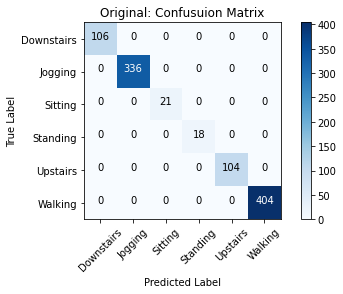

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       336
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00       104
           5       1.00      1.00      1.00       404

    accuracy                           1.00       989
   macro avg       1.00      1.00      1.00       989
weighted avg       1.00      1.00      1.00       989

                   pre       rec       spe        f1       geo       iba       sup

 Downstairs       1.00      1.00      1.00      1.00      1.00      1.00       106
    Jogging       1.00      1.00      1.00      1.00      1.00      1.00       336
    Sitting       1.00      1.00      1.00      1.00      1.00      1.00        21
   Standing       1.00      1.00      1.00      1.00      1.00      1.00        18
   Upstairs       1.00      1.00      1.0

In [162]:
clf2= KNeighborsClassifier(n_neighbors=1, metric = mmc.get_metric())
knnModel2 = clf2.fit(trainData,trainLabelE)
y_te_pred2 = clf2.predict(testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))
print(classification_report_imbalanced(testLabelE,y_te_pred2,     target_names=class_names))

K-Nearest Neighbors Accuracy: 0.81598
Confusion matrix, without normalization
[[ 42   3   0   1  21  39]
 [  1 334   0   0   1   0]
 [  0   0  21   0   0   0]
 [  1   0   0  17   0   0]
 [ 24   7   0   0  42  31]
 [ 41   0   0   0  12 351]]


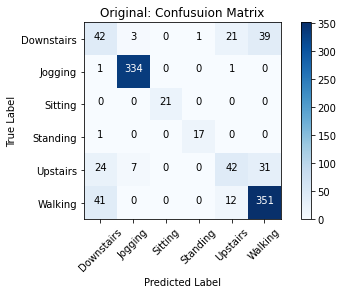

              precision    recall  f1-score   support

           0       0.39      0.40      0.39       106
           1       0.97      0.99      0.98       336
           2       1.00      1.00      1.00        21
           3       0.94      0.94      0.94        18
           4       0.55      0.40      0.47       104
           5       0.83      0.87      0.85       404

    accuracy                           0.82       989
   macro avg       0.78      0.77      0.77       989
weighted avg       0.81      0.82      0.81       989

                   pre       rec       spe        f1       geo       iba       sup

 Downstairs       0.39      0.40      0.92      0.39      0.61      0.35       106
    Jogging       0.97      0.99      0.98      0.98      0.99      0.98       336
    Sitting       1.00      1.00      1.00      1.00      1.00      1.00        21
   Standing       0.94      0.94      1.00      0.94      0.97      0.94        18
   Upstairs       0.55      0.40      0.9

In [163]:
from sklearn import svm

model = svm.SVC(kernel='rbf') 
model.fit(trainData,trainLabelE)
y_pred= model.predict(testData)

acc2 = accuracy_score(testLabelE,y_pred)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_pred)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_pred))
print(classification_report_imbalanced(testLabelE,y_pred,     target_names=class_names))

K-Nearest Neighbors Accuracy: 0.91507
Confusion matrix, without normalization
[[ 64   0   0   0  13  29]
 [  0 334   0   0   0   2]
 [  0   0  21   0   0   0]
 [  0   0   0  18   0   0]
 [ 14   1   0   0  73  16]
 [  6   0   0   0   3 395]]


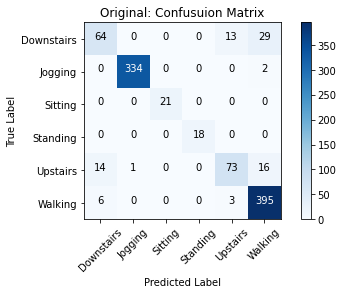

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       106
           1       1.00      0.99      1.00       336
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        18
           4       0.82      0.70      0.76       104
           5       0.89      0.98      0.93       404

    accuracy                           0.92       989
   macro avg       0.91      0.88      0.89       989
weighted avg       0.91      0.92      0.91       989

                   pre       rec       spe        f1       geo       iba       sup

 Downstairs       0.76      0.60      0.98      0.67      0.77      0.57       106
    Jogging       1.00      0.99      1.00      1.00      1.00      0.99       336
    Sitting       1.00      1.00      1.00      1.00      1.00      1.00        21
   Standing       1.00      1.00      1.00      1.00      1.00      1.00        18
   Upstairs       0.82      0.70      0.9

In [164]:
from xgboost import XGBClassifier
model = XGBClassifier() 
model.fit(trainData,trainLabelE)
y_pred= model.predict(testData)

acc2 = accuracy_score(testLabelE,y_pred)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_pred)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_pred))
print(classification_report_imbalanced(testLabelE,y_pred,     target_names=class_names))